# HNRNPC

In [1]:
from data import FShapeFileReader, FShapeDirectoryReader

motif = FShapeFileReader("data/HNRNPC/hnrnpc_expected_pattern.txt").read()
sequences = FShapeDirectoryReader("data/HNRNPC/hnrnpc_binding_sites_fshape").read()
unknown_sequences = FShapeDirectoryReader("data/HNRNPC/hnrnpc_search_fshape").read()

Length of motif: 6
FShape: [0.   1.25 1.15 3.   1.7  0.1 ]


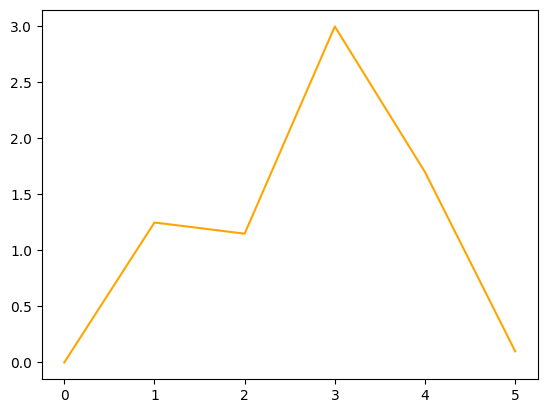

In [2]:
from visualizations import visualize_motif

visualize_motif(motif)

In [3]:
from tools import PromisingMotifsFinder

motif_length = len(motif)
promising_motifs = {length: [] for length in range(motif_length, motif_length + 3)}
for length in promising_motifs.keys():
    pmf = PromisingMotifsFinder(motif)
    for s in sequences:
        promising_motifs[length].extend(pmf.find(s, length))

In [4]:
for key, value in promising_motifs.items():
    print(key, len(value))

6 684
7 735
8 778


## DBScan

In [5]:
from tools import DBScanClusterer

db_clusters = {length: [] for length in promising_motifs.keys()}
epss = (0.8, 1.15, 1.5)
for length, eps in zip(promising_motifs.keys(), epss):
    db_clusters[length] = DBScanClusterer(eps=eps).transform(promising_motifs[length])

6
Number of clusters: 162


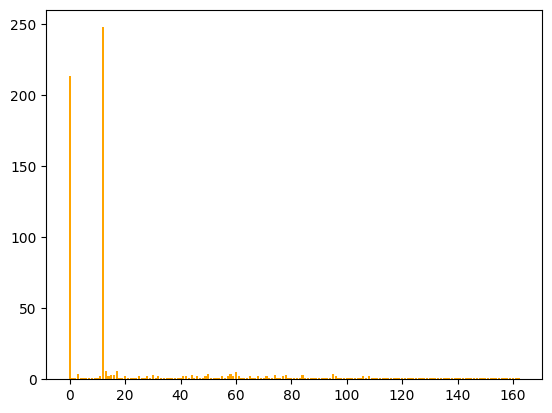

7
Number of clusters: 99


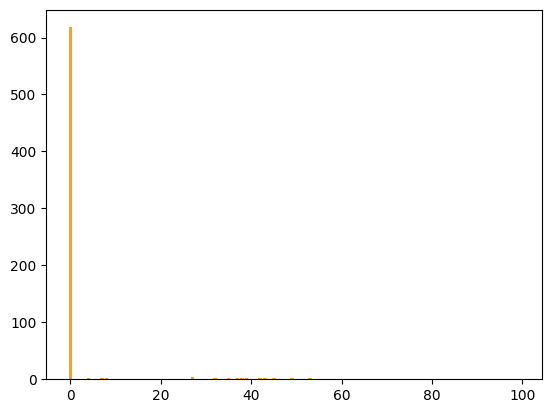

8
Number of clusters: 63


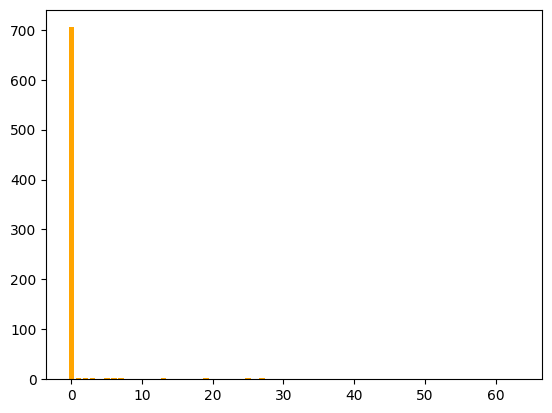

In [6]:
from visualizations import visualize_statistics_clusters

for length in db_clusters.keys():
    print(length)
    clusters = db_clusters[length]
    visualize_statistics_clusters(clusters)

Length of motif: 8
FShape: [-0.13045716  0.17064771  0.91567908  0.54544805  1.20620432 -0.39897435
  0.73115746 -0.14582573]


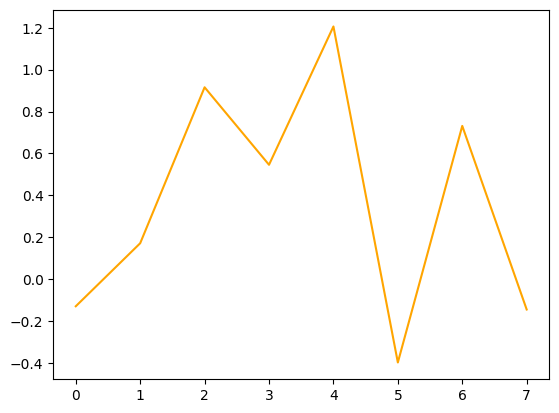

Length of motif: 7
FShape: [1.30121221 0.71277192 1.5296404  1.28139187 0.85486016 0.79046658
 0.95154177]


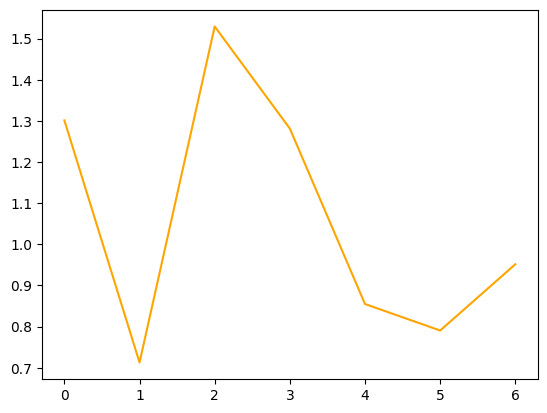

Length of motif: 6
FShape: [0.75667719 0.86707291 1.1152538  0.19287759 0.0680021  0.16533925]


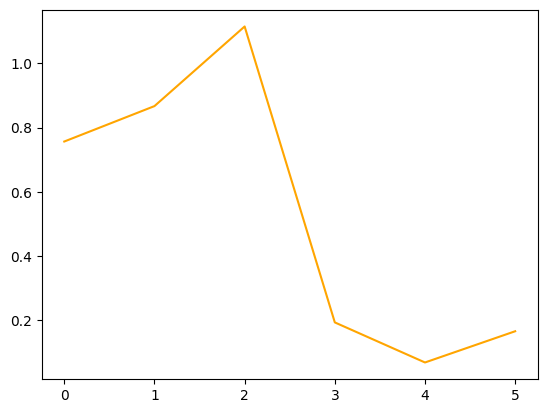

In [7]:
from tools import ConsensusMotifsFinder

consensus_motifs = ConsensusMotifsFinder().compute_consensus(promising_motifs, db_clusters)
for cm in consensus_motifs:
    visualize_motif(cm)

In [8]:
from tools import SimilarMotifsFinder

similar_motifs_finder = SimilarMotifsFinder(consensus_motifs, motif)
new_motifs = similar_motifs_finder.compute_similar(unknown_sequences)
print(new_motifs.shape)

/home/annprzy/blobiki3DV3/.venv/lib/python3.10/site-packages/stumpy/core.py:2243: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


(19863, 9)


In [9]:
new_motifs.head(15)

,new_motif,new_motif_same_len,nucleotides_range,len_new_motif,file,zned,ssf,as,consensus_motif
485,TTCCTG,TTCCTG,"(797, 802)",6,hnrnpc_NM_014214_IMPA2.txt,0.349709,1.666667,1.830422,NTTTTN
1174,GCCATA,GCCATA,"(608, 613)",6,hnrnpc_NM_017527_LY6K.txt,0.354320,1.333333,2.209865,NTTTTN
612,CTGGTG,CTGGTG,"(490, 495)",6,hnrnpc_NM_001195129_PRSS56.txt,0.367591,1.333333,2.342574,NTTTTN
4336,GCAGCG,GCAGCG,"(832, 837)",6,hnrnpc_NM_000067_CA2.txt,0.374583,1.000000,2.745833,NTTTTN
4383,TGATTT,TGATTT,"(1037, 1042)",6,hnrnpc_NM_000067_CA2.txt,0.437997,1.333333,3.046635,NTTTTN
1128,GTCCCT,GTCCCT,"(1157, 1162)",6,hnrnpc_NM_002116_HLA-A.txt,0.512117,1.500000,3.621166,NTTTTN
5839,TGTCCCTC,GTCCCT,"(1156, 1163)",8,hnrnpc_NM_002116_HLA-A.txt,0.512117,1.500000,3.621166,TTCGTGTC
1117,ACGGAG,ACGGAG,"(837, 842)",6,hnrnpc_NM_002116_HLA-A.txt,0.469164,0.833333,3.858306,NTTTTN
771,ACTGCG,ACTGCG,"(1395, 1400)",6,hnrnpc_NM_001195129_PRSS56.txt,0.550674,1.333333,4.173409,NTTTTN
4185,GTCTTA,GTCTTA,"(763, 768)",6,hnrnpc_NM_014220_TM4SF1.txt,0.600703,1.833333,4.173695,NTTTTN


## Agglomerative Clustering

In [10]:
from tools import AgglomerativeClusterer

db_clusters = {length: [] for length in promising_motifs.keys()}
for length in promising_motifs.keys():
    db_clusters[length] = AgglomerativeClusterer().transform(promising_motifs[length])

6
Number of clusters: 76


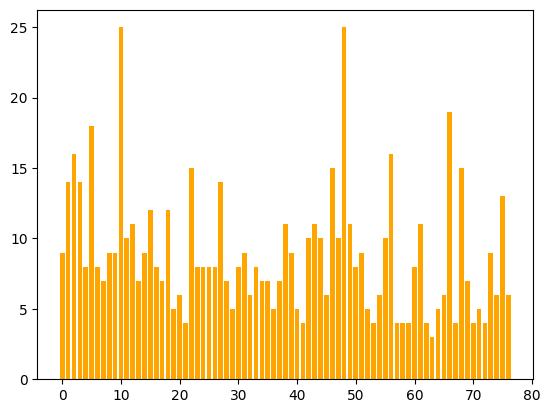

7
Number of clusters: 101


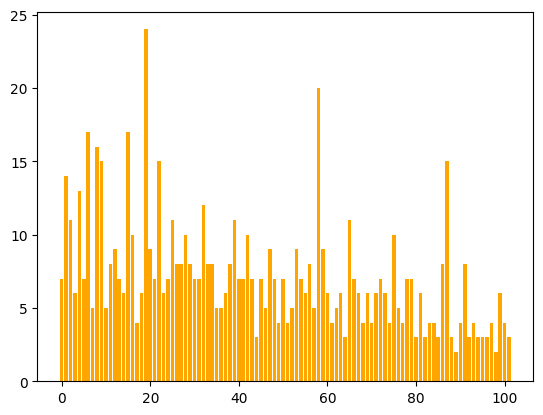

8
Number of clusters: 131


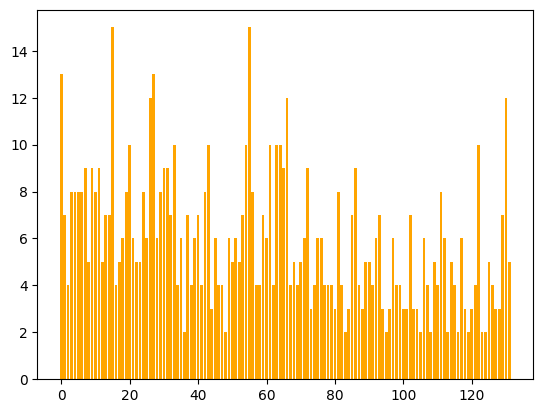

In [11]:
for length in db_clusters.keys():
    print(length)
    clusters = db_clusters[length]
    visualize_statistics_clusters(clusters)

Length of motif: 6
FShape: [ 1.32580964  0.63616895  0.27616554  0.084137   -0.01070691  0.20596882]


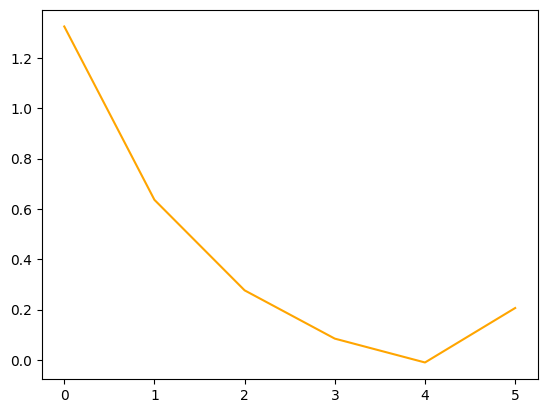

Length of motif: 6
FShape: [3.20269705 2.9257659  1.0319226  1.44460113 0.67069922 0.31568155]


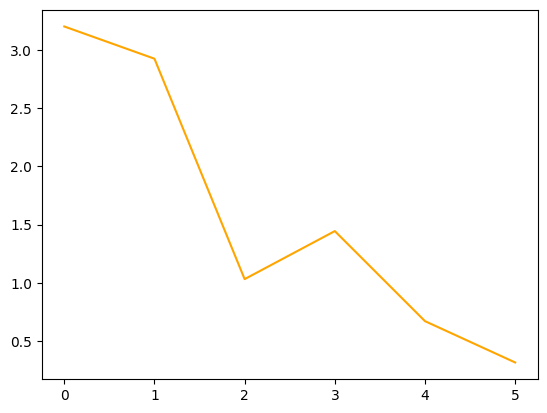

Length of motif: 7
FShape: [ 1.400823    1.0158102   0.18912633  0.03790984 -0.01351838 -0.02474006
  0.02732427]


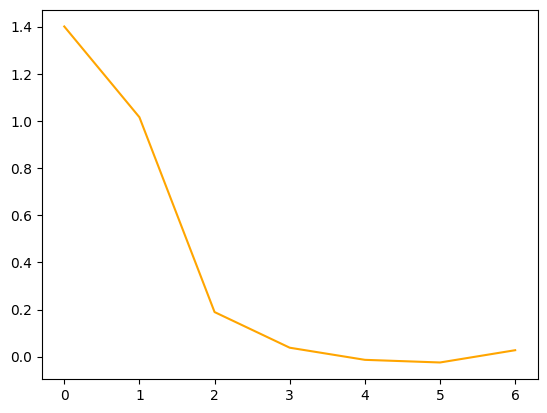

In [12]:
from tools import ConsensusMotifsFinder

consensus_motifs = ConsensusMotifsFinder().compute_consensus(promising_motifs, db_clusters)
for cm in consensus_motifs:
    visualize_motif(cm)

In [13]:
from tools import SimilarMotifsFinder

similar_motifs_finder = SimilarMotifsFinder(consensus_motifs, motif)
new_motifs = similar_motifs_finder.compute_similar(unknown_sequences)
print(new_motifs.shape)

/home/annprzy/blobiki3DV3/.venv/lib/python3.10/site-packages/stumpy/core.py:2243: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


(30466, 9)


In [14]:
new_motifs.head(15)

,new_motif,new_motif_same_len,nucleotides_range,len_new_motif,file,zned,ssf,as,consensus_motif
485,TTCCTG,TTCCTG,"(797, 802)",6,hnrnpc_NM_014214_IMPA2.txt,0.349709,1.666667,1.830422,NTTTTN
1174,GCCATA,GCCATA,"(608, 613)",6,hnrnpc_NM_017527_LY6K.txt,0.354320,1.333333,2.209865,NTTTTN
612,CTGGTG,CTGGTG,"(490, 495)",6,hnrnpc_NM_001195129_PRSS56.txt,0.367591,1.333333,2.342574,NTTTTN
4336,GCAGCG,GCAGCG,"(832, 837)",6,hnrnpc_NM_000067_CA2.txt,0.374583,1.000000,2.745833,NTTTTN
4383,TGATTT,TGATTT,"(1037, 1042)",6,hnrnpc_NM_000067_CA2.txt,0.437997,1.333333,3.046635,NTTTTN
1128,GTCCCT,GTCCCT,"(1157, 1162)",6,hnrnpc_NM_002116_HLA-A.txt,0.512117,1.500000,3.621166,NTTTTN
1117,ACGGAG,ACGGAG,"(837, 842)",6,hnrnpc_NM_002116_HLA-A.txt,0.469164,0.833333,3.858306,NTTTTN
771,ACTGCG,ACTGCG,"(1395, 1400)",6,hnrnpc_NM_001195129_PRSS56.txt,0.550674,1.333333,4.173409,NTTTTN
4185,GTCTTA,GTCTTA,"(763, 768)",6,hnrnpc_NM_014220_TM4SF1.txt,0.600703,1.833333,4.173695,NTTTTN
2764,CTTTTT,CTTTTT,"(4919, 4924)",6,hnrnpc_NM_001875_CPS1.txt,0.619527,2.000000,4.195267,NTTTTN


# HNRNPA2B1

In [15]:
from data import FShapeFileReader, FShapeDirectoryReader

motif = FShapeFileReader("data/HNRNPA2B1/hnrnpa2b1_expected_pattern.txt").read()
sequences = FShapeDirectoryReader("data/HNRNPA2B1/hnrnpa2b1_binding_sites_fshape").read()
unknown_sequences = FShapeDirectoryReader("data/HNRNPA2B1/hnrnpa2b1_search_fshape").read()

Length of motif: 11
FShape: [0.  1.  2.  3.  2.  0.  0.  1.  0.5 0.5 0. ]


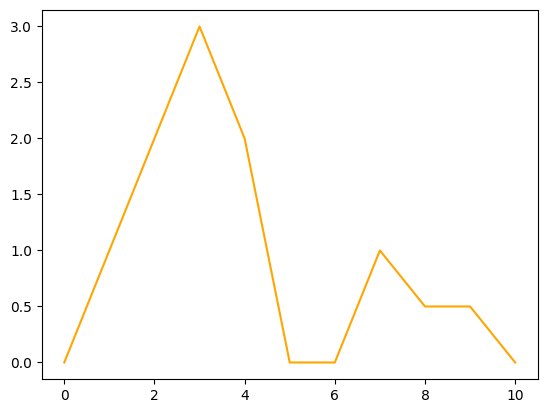

In [16]:
visualize_motif(motif)

In [17]:
motif_length = len(motif)
promising_motifs = {length: [] for length in range(motif_length, motif_length + 3)}
for length in promising_motifs.keys():
    pmf = PromisingMotifsFinder(motif)
    for s in sequences:
        promising_motifs[length].extend(pmf.find(s, length))

In [18]:
for key, value in promising_motifs.items():
    print(key, len(value))

11 1584
12 1634
13 1677


## DBScan

In [19]:
db_clusters = {length: [] for length in promising_motifs.keys()}
epss = (0.8, 1.15, 1.5)
for length, eps in zip(promising_motifs.keys(), epss):
    db_clusters[length] = DBScanClusterer(eps=eps).transform(promising_motifs[length])

11
Number of clusters: 1522


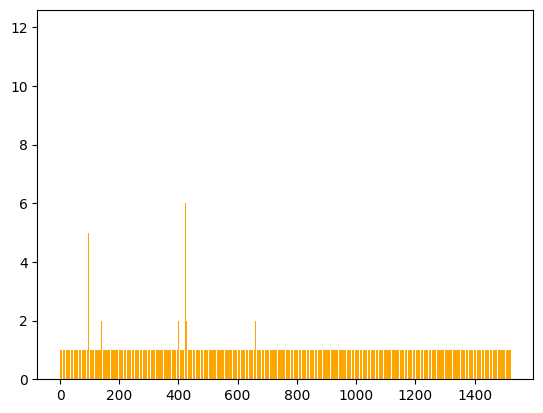

12
Number of clusters: 1422


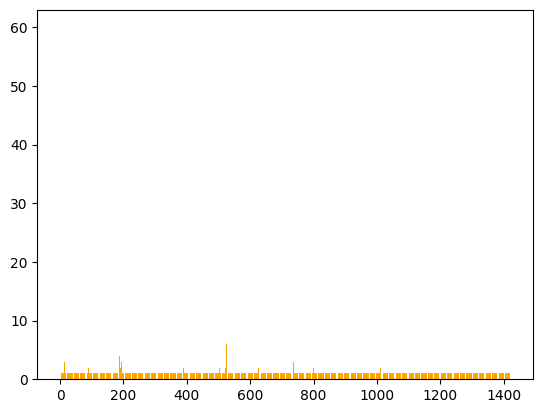

13
Number of clusters: 1254


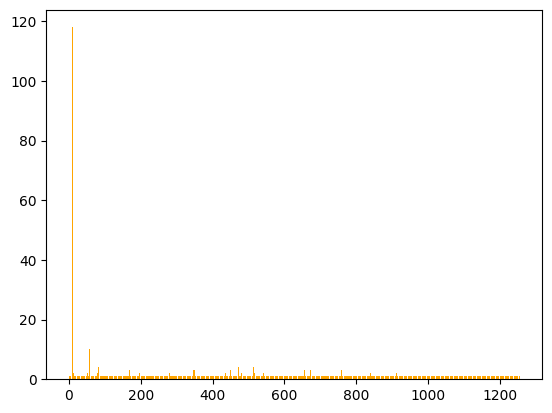

In [20]:
for length in db_clusters.keys():
    print(length)
    clusters = db_clusters[length]
    visualize_statistics_clusters(clusters)

Length of motif: 13
FShape: [ 1.57864713  1.62997812  0.95308523  0.86283358  1.08489894 -0.06505475
  0.13123589  0.00291494 -0.03022336  0.1350745   0.05169172  0.19097737
  0.71971947]


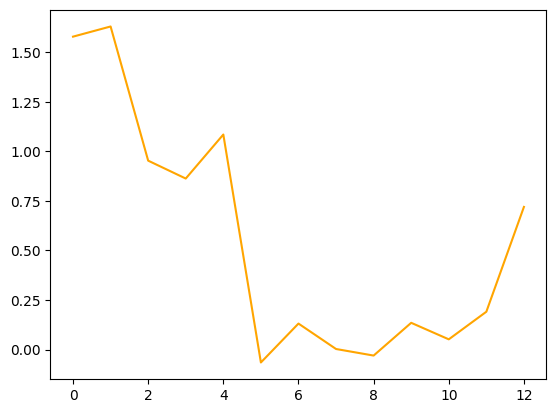

Length of motif: 13
FShape: [-0.44506485 -0.35822146  0.04149139 -0.08310936 -0.05379315 -0.10262112
 -0.08329877  0.00859621  0.23904104  0.03215093  1.41633305  1.53944204
  1.49468139]


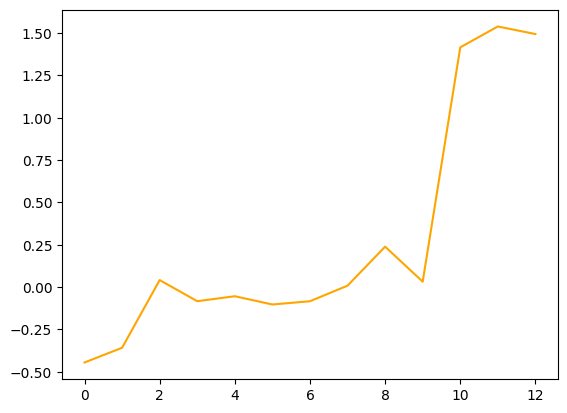

Length of motif: 12
FShape: [-1.28009603 -0.23948827  0.00570172  0.109241   -0.66807498 -0.32226483
 -0.94120906 -0.03714991  0.02069377 -0.10906574  3.3687868   3.66237196]


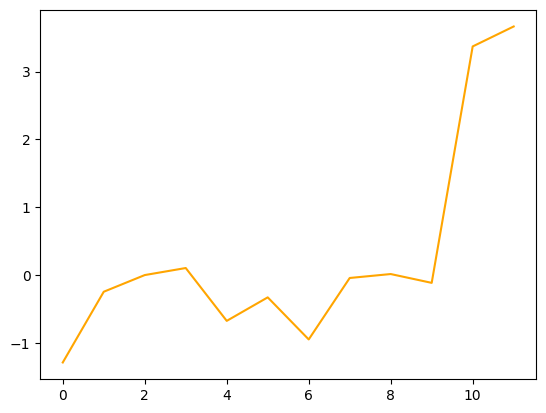

In [21]:
consensus_motifs = ConsensusMotifsFinder().compute_consensus(promising_motifs, db_clusters)
for cm in consensus_motifs:
    visualize_motif(cm)

In [22]:
similar_motifs_finder = SimilarMotifsFinder(consensus_motifs, motif)
new_motifs = similar_motifs_finder.compute_similar(unknown_sequences)
print(new_motifs.shape)

/home/annprzy/blobiki3DV3/.venv/lib/python3.10/site-packages/stumpy/core.py:2243: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


(93491, 9)


In [23]:
new_motifs.head(15)

,new_motif,new_motif_same_len,nucleotides_range,len_new_motif,file,zned,ssf,as,consensus_motif
11914,CACGTGCTGCC,CACGTGCTGCC,"(655, 665)",11,hnrnpa2b1_NM_003313_TSTA3.txt,0.585678,1.363636,4.493140,NNAGGNNTAGN
16023,GCTCCGCGTGC,GCTCCGCGTGC,"(777, 787)",11,hnrnpa2b1_NM_198589_BSG.txt,0.786971,1.090909,6.778802,NNAGGNNTAGN
9747,TGAGCCCTGGC,TGAGCCCTGGC,"(53, 63)",11,hnrnpa2b1_NM_014402_UQCRQ.txt,0.898423,1.727273,7.256960,NNAGGNNTAGN
4263,TCTTTTTGAGA,TCTTTTTGAGA,"(5261, 5271)",11,hnrnpa2b1_NM_001875_CPS1.txt,0.866081,1.272727,7.388083,NNAGGNNTAGN
14994,GCAGTAAAATG,GCAGTAAAATG,"(876, 886)",11,hnrnpa2b1_NM_004718_COX7A2L.txt,0.930436,1.454545,7.849810,NNAGGNNTAGN
15080,AAGAATCCCAC,AAGAATCCCAC,"(326, 336)",11,hnrnpa2b1_NM_033546_MYL12B.txt,0.938949,1.363636,8.025858,NNAGGNNTAGN
6975,CAAAAAGTGCA,CAAAAAGTGCA,"(964, 974)",11,hnrnpa2b1_NM_001901_CTGF.txt,0.964079,1.545455,8.095339,NNAGGNNTAGN
2499,GACAAGTCCAG,GACAAGTCCAG,"(508, 518)",11,hnrnpa2b1_NM_001909_CTSD.txt,0.938361,1.272727,8.110884,NNAGGNNTAGN
5279,CAAAATCAAGC,CAAAATCAAGC,"(1243, 1253)",11,hnrnpa2b1_NM_000918_P4HB.txt,0.979781,1.636364,8.161451,NNAGGNNTAGN
10900,GATATCCAACC,GATATCCAACC,"(443, 453)",11,hnrnpa2b1_NM_005313_PDIA3.txt,0.947861,1.181818,8.296792,NNAGGNNTAGN


## Agglomerative Clustering

In [24]:
db_clusters = {length: [] for length in promising_motifs.keys()}
for length in promising_motifs.keys():
    db_clusters[length] = AgglomerativeClusterer().transform(promising_motifs[length])

11
Number of clusters: 404


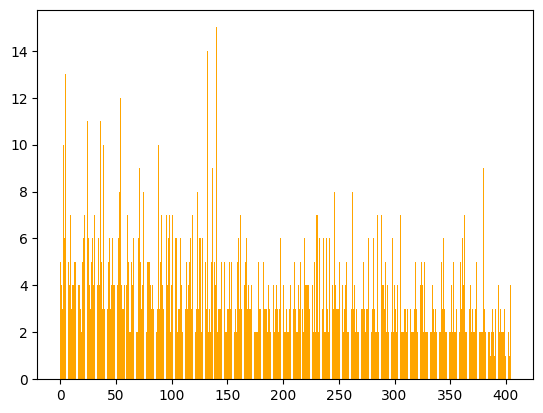

12
Number of clusters: 487


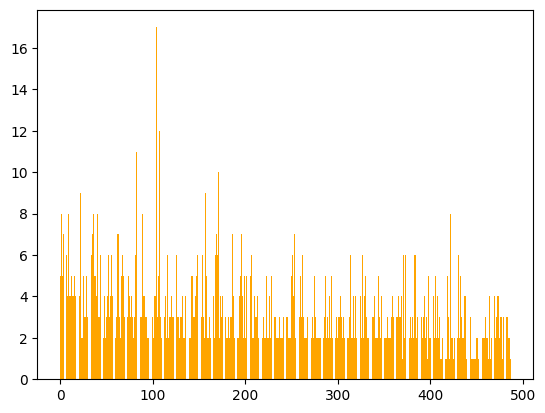

13
Number of clusters: 569


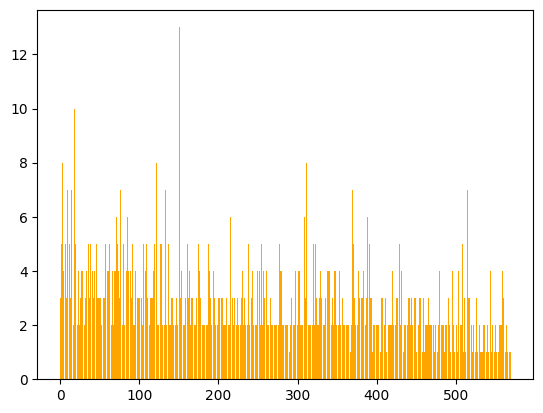

In [25]:
for length in db_clusters.keys():
    print(length)
    clusters = db_clusters[length]
    visualize_statistics_clusters(clusters)

Length of motif: 12
FShape: [ 0.00690178 -0.02305991 -0.0210737   0.0789365   0.03982505  0.04690161
  0.01607717  0.03966048  0.06224865  0.1020116   0.48802283  1.70059158]


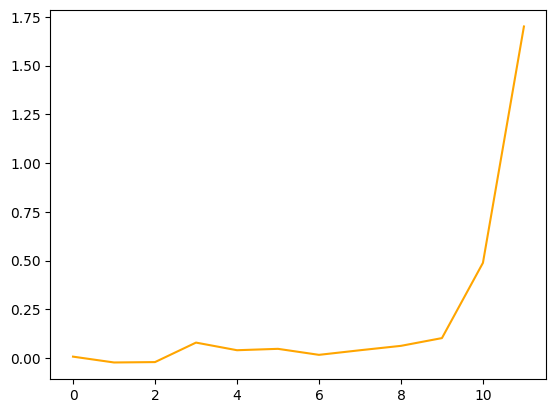

Length of motif: 11
FShape: [ 0.05725779  0.38051793  0.70866487  0.68062502  0.32769581  0.13231347
 -0.07364447 -0.00571517 -0.06988474  1.36780586  5.03638428]


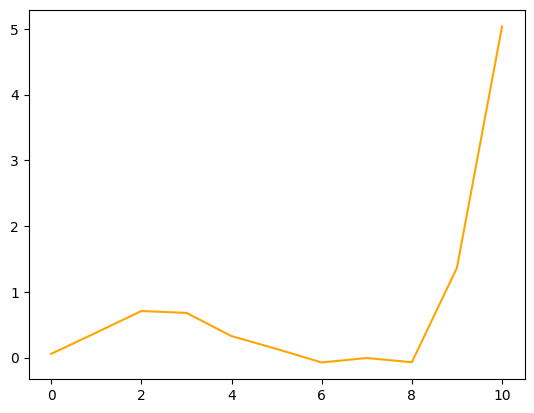

Length of motif: 11
FShape: [ 1.09220661  0.25192096 -0.03066054  0.03601249 -0.04595641  0.04588018
  0.15832388 -0.05520607  0.03807319  0.07591476 -0.07733574]


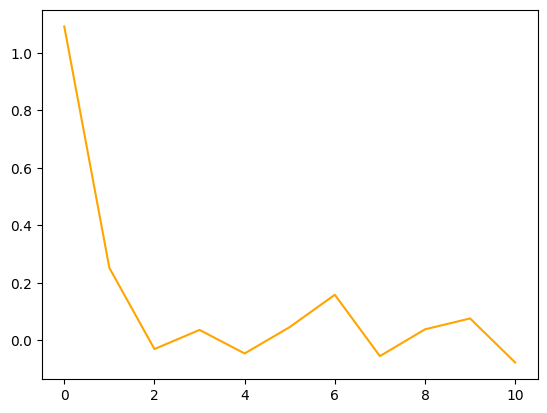

In [26]:
consensus_motifs = ConsensusMotifsFinder().compute_consensus(promising_motifs, db_clusters)
for cm in consensus_motifs:
    visualize_motif(cm)

In [27]:
similar_motifs_finder = SimilarMotifsFinder(consensus_motifs, motif)
new_motifs = similar_motifs_finder.compute_similar(unknown_sequences)
print(new_motifs.shape)

/home/annprzy/blobiki3DV3/.venv/lib/python3.10/site-packages/stumpy/core.py:2243: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


(148993, 9)


In [28]:
new_motifs.head(15)

,new_motif,new_motif_same_len,nucleotides_range,len_new_motif,file,zned,ssf,as,consensus_motif
11914,CACGTGCTGCC,CACGTGCTGCC,"(655, 665)",11,hnrnpa2b1_NM_003313_TSTA3.txt,0.585678,1.363636,4.493140,NNAGGNNTAGN
16023,GCTCCGCGTGC,GCTCCGCGTGC,"(777, 787)",11,hnrnpa2b1_NM_198589_BSG.txt,0.786971,1.090909,6.778802,NNAGGNNTAGN
9747,TGAGCCCTGGC,TGAGCCCTGGC,"(53, 63)",11,hnrnpa2b1_NM_014402_UQCRQ.txt,0.898423,1.727273,7.256960,NNAGGNNTAGN
4263,TCTTTTTGAGA,TCTTTTTGAGA,"(5261, 5271)",11,hnrnpa2b1_NM_001875_CPS1.txt,0.866081,1.272727,7.388083,NNAGGNNTAGN
14994,GCAGTAAAATG,GCAGTAAAATG,"(876, 886)",11,hnrnpa2b1_NM_004718_COX7A2L.txt,0.930436,1.454545,7.849810,NNAGGNNTAGN
15080,AAGAATCCCAC,AAGAATCCCAC,"(326, 336)",11,hnrnpa2b1_NM_033546_MYL12B.txt,0.938949,1.363636,8.025858,NNAGGNNTAGN
6975,CAAAAAGTGCA,CAAAAAGTGCA,"(964, 974)",11,hnrnpa2b1_NM_001901_CTGF.txt,0.964079,1.545455,8.095339,NNAGGNNTAGN
2499,GACAAGTCCAG,GACAAGTCCAG,"(508, 518)",11,hnrnpa2b1_NM_001909_CTSD.txt,0.938361,1.272727,8.110884,NNAGGNNTAGN
5279,CAAAATCAAGC,CAAAATCAAGC,"(1243, 1253)",11,hnrnpa2b1_NM_000918_P4HB.txt,0.979781,1.636364,8.161451,NNAGGNNTAGN
10900,GATATCCAACC,GATATCCAACC,"(443, 453)",11,hnrnpa2b1_NM_005313_PDIA3.txt,0.947861,1.181818,8.296792,NNAGGNNTAGN
